# Handle Outliers from the data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load Preprocessed data
df2=pd.read_csv("E:\\10xAccademy_Practice\\Week 1\\Data\\Preprocessed_TelecomData.csv")
df2.head(5)

,bearer_id,start,start_ms,end,end_ms,dur._(ms),imsi,msisdn/number,imei,last_location_name,...,total_ul_(bytes),total_dl_(bytes),social_media,google,email,youtube,netflix,gaming,other,total_data
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,36749741.0,308879636.0,1.570185,2.905912,3.701304,18.355943,17.855187,292.426453,180.558843,345.629377
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,53800391.0,653384965.0,1.933278,4.414096,0.937385,39.359124,35.565545,609.920783,541.959383,707.185356
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,27883638.0,279807335.0,1.726277,10.229119,3.363124,34.425237,23.751202,229.980251,414.908351,307.690973
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,43324218.0,846028530.0,0.657493,11.811761,2.070983,36.534765,15.092588,810.387875,761.837216,889.352748
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,38542814.0,569138589.0,0.912788,7.748843,2.110349,34.222253,17.539799,531.237049,564.619822,607.681403


# check the distribution of the data using Skewness

array([[<AxesSubplot:title={'center':'bearer_id'}>,
        <AxesSubplot:title={'center':'start_ms'}>,
        <AxesSubplot:title={'center':'end_ms'}>,
        <AxesSubplot:title={'center':'dur._(ms)'}>,
        <AxesSubplot:title={'center':'imsi'}>,
        <AxesSubplot:title={'center':'msisdn/number'}>,
        <AxesSubplot:title={'center':'imei'}>,
        <AxesSubplot:title={'center':'avg_rtt_dl_(ms)'}>],
       [<AxesSubplot:title={'center':'avg_rtt_ul_(ms)'}>,
        <AxesSubplot:title={'center':'avg_bearer_tp_dl_(kbps)'}>,
        <AxesSubplot:title={'center':'avg_bearer_tp_ul_(kbps)'}>,
        <AxesSubplot:title={'center':'tcp_dl_retrans._vol_(bytes)'}>,
        <AxesSubplot:title={'center':'tcp_ul_retrans._vol_(bytes)'}>,
        <AxesSubplot:title={'center':'dl_tp_<_50_kbps_(%)'}>,
        <AxesSubplot:title={'center':'50_kbps_<_dl_tp_<_250_kbps_(%)'}>,
        <AxesSubplot:title={'center':'250_kbps_<_dl_tp_<_1_mbps_(%)'}>],
       [<AxesSubplot:title={'center':'dl_tp_>_1_m

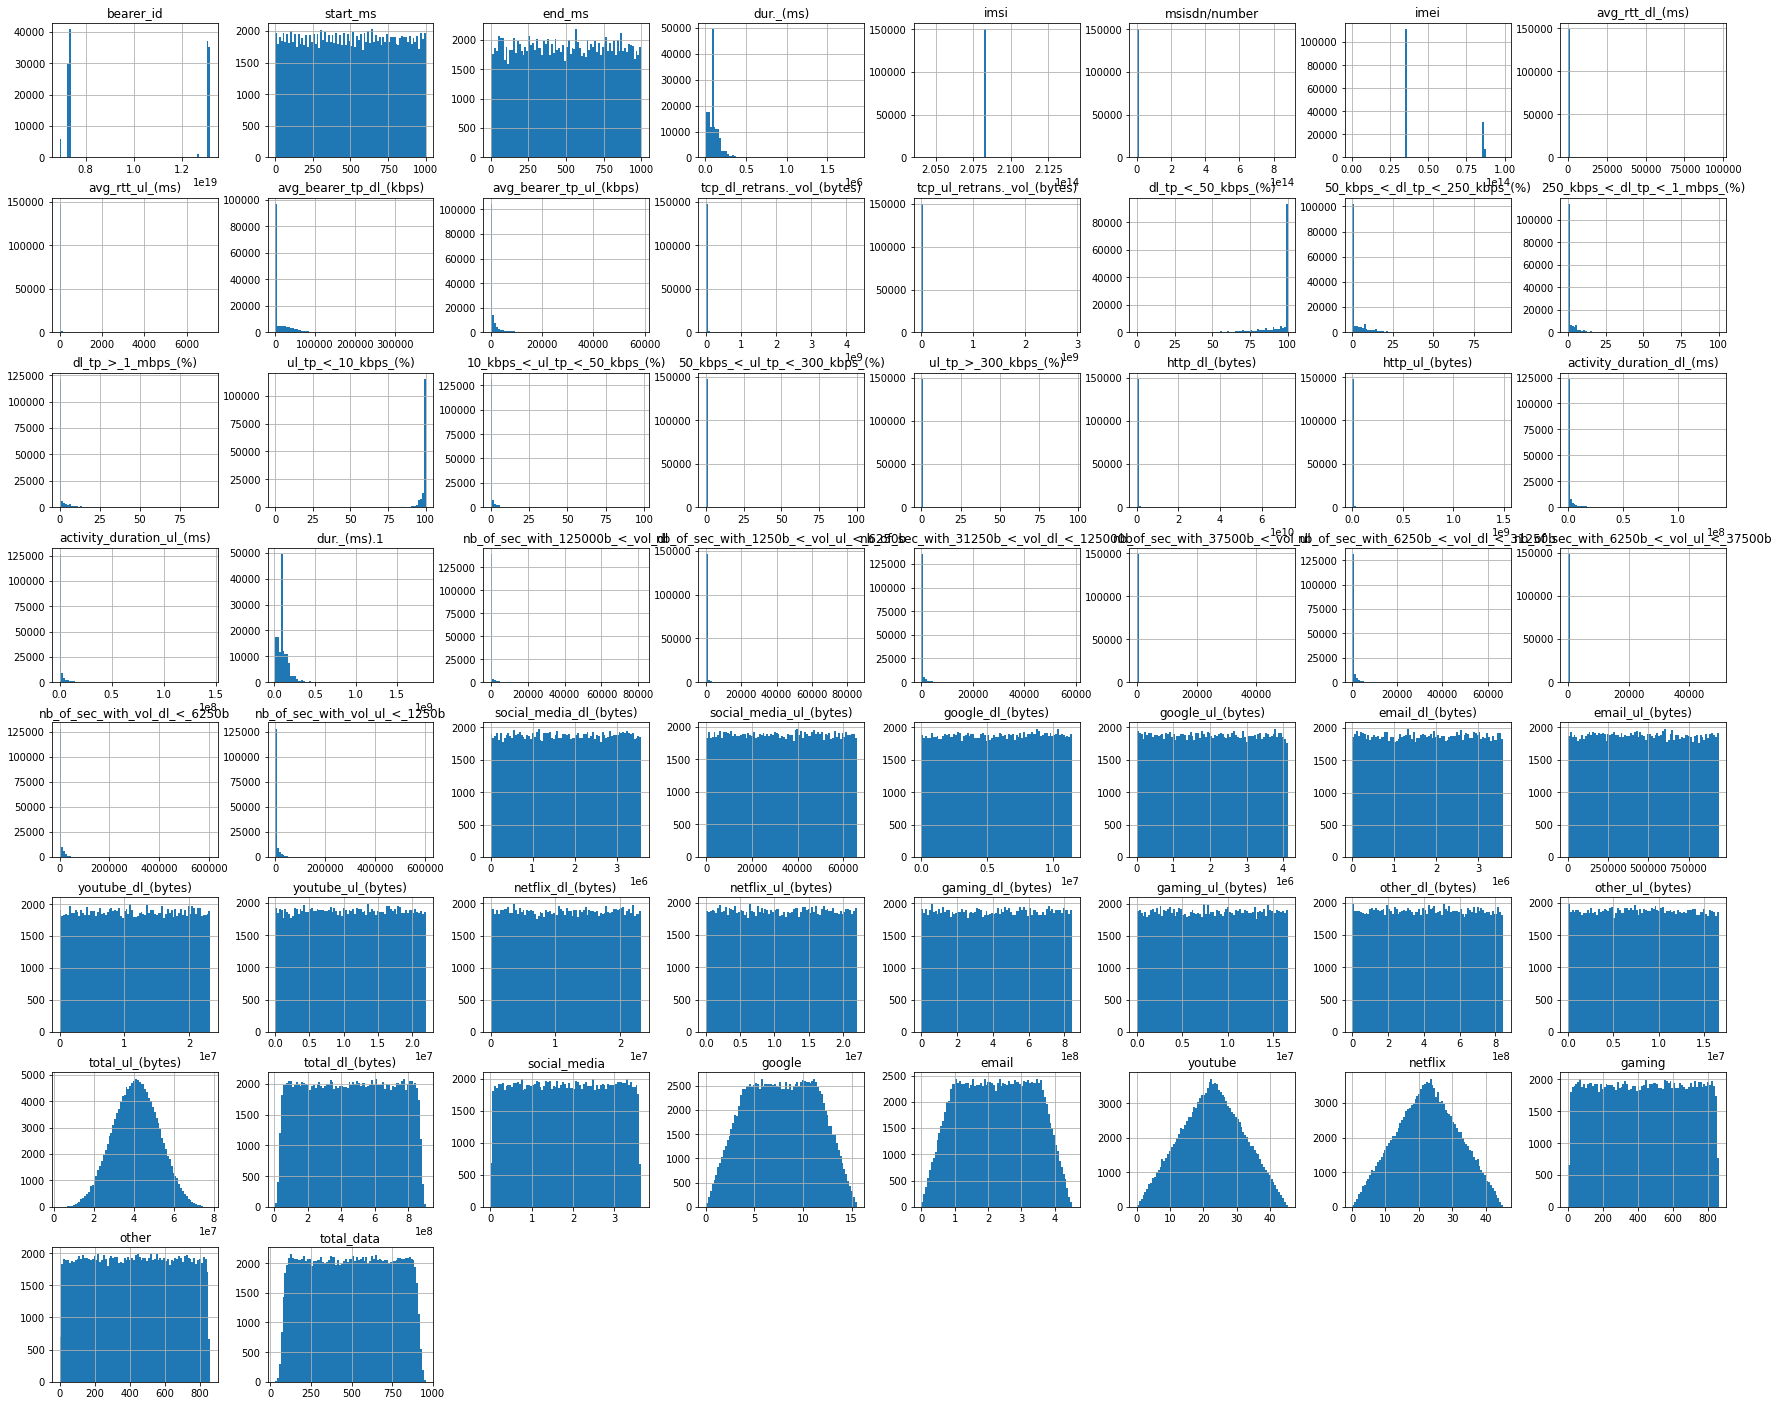

In [5]:
#Check the skewness of the data using histogram plot
df2.hist(bins=80, figsize=(30,25))

In [6]:
# The distribution of the data shown above is not normaly distributed,it is skewed to the right or to the left
# this shows dataset contains outliers, so, need to be handled 
skew=df2.skew(axis=0, skipna=True)
skew

C:\Users\HB\AppData\Local\Temp\ipykernel_7264\11551681.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  skew=df2.skew(axis=0, skipna=True)


bearer_id                                     0.039699
start_ms                                      0.000968
end_ms                                       -0.001163
dur._(ms)                                     3.952624
imsi                                         41.124210
msisdn/number                               333.342445
imei                                          1.077346
avg_rtt_dl_(ms)                              69.557811
avg_rtt_ul_(ms)                              31.426589
avg_bearer_tp_dl_(kbps)                       2.589447
avg_bearer_tp_ul_(kbps)                       4.503429
tcp_dl_retrans._vol_(bytes)                  24.875258
tcp_ul_retrans._vol_(bytes)                 141.019902
dl_tp_<_50_kbps_(%)                          -2.305834
50_kbps_<_dl_tp_<_250_kbps_(%)                3.280537
250_kbps_<_dl_tp_<_1_mbps_(%)                 4.577684
dl_tp_>_1_mbps_(%)                            5.384242
ul_tp_<_10_kbps_(%)                          -9.006524
10_kbps_<_

In [4]:
import sys

import numpy as np
import pandas as pd
from logger import Logger


class Handle_OutlierData:
    def __init__(self, df: pd.DataFrame):
        self.df = df
   
    def handle_outliers(self, df: pd.DataFrame, cols):
        """Handle outliers in the dataset.

        Args:
            df (pd.DataFrame): a dataframe to be preprocessed

        Returns:
            pd.DataFrame: the dataframe
        """
        # Get numerical columns
        # num_cols = df.select_dtypes(include=np.number).columns
        for col in cols:
            # Computing 10th, 90th percentiles and replacing the outliers
            df[col] = [np.log(x) for x in df[col]]
        return df

    def calculate_num_outliers_zscore(self, col):
        """Return the number of outliers for each numerical col.

        Args:
            col (pd.DataFrame): a dataframe to be analyzed
        """
        # calculate skewness
        outliers = []

        thres = 3
        mean = np.mean(col)
        std = np.std(col)
        # print(mean, std)
        for i in col:
            z_score = (i-mean)/std
            if (np.abs(z_score) > thres):
                outliers.append(i)
        return outliers  # Driver code

        # sample_outliers = detect_outliers_zscore(
        #     df['nb_of_sec_with_vol_ul_<_1250b'])
        # print("Outliers from Z-scores method: ", len(sample_outliers))

    def calculate_num_outliers_iqr(self, df, cols):
        """Return the number of outliers for each col.

        Args:
            df (pd.DataFrame): a dataframe to be analyzed
        """
        # calculate skewness

        outliersTot = {}
        for col in cols:
            outliers = []
            df[col] = sorted(df[col])
            q1 = np.percentile(df[col], 25)
            q3 = np.percentile(df[col], 75)
            # print(q1, q3)
            IQR = q3-q1
            lwr_bound = q1-(1.5*IQR)
            upr_bound = q3+(1.5*IQR)
            # print(lwr_bound, upr_bound)
            for i in df[col]:
                if (i < lwr_bound or i > upr_bound):
                    outliers.append(i)
            outliers[col] = len(outliers)
        return outliersTot  # Driver code

    def outlier_overview(self, df, col):
        """Get outlier overview.

        Args:
            df (pd.DataFrame): a dataframe to be analyzed
        """

        # calculate upper and lower limits
        upper_limit = df[col].mean() + 3 * df['total_ul_(bytes)'].std()
        lower_limit = df[col].mean() - 3 * df['total_ul_(bytes)'].std()

        # select outliers
        return df[~((df[col] < upper_limit) & (df[col] > lower_limit))]

        # # outliers removed
        # display(df[(df[col] < upper_limit) & (df[col] > lower_limit)])


In [9]:
out1=Handle_OutlierData(df2)

In [5]:
df2.columns

Index(['bearer_id', 'start', 'start_ms', 'end', 'end_ms', 'dur._(ms)', 'imsi',
       'msisdn/number', 'imei', 'last_location_name', 'avg_rtt_dl_(ms)',
       'avg_rtt_ul_(ms)', 'avg_bearer_tp_dl_(kbps)', 'avg_bearer_tp_ul_(kbps)',
       'tcp_dl_retrans._vol_(bytes)', 'tcp_ul_retrans._vol_(bytes)',
       'dl_tp_<_50_kbps_(%)', '50_kbps_<_dl_tp_<_250_kbps_(%)',
       '250_kbps_<_dl_tp_<_1_mbps_(%)', 'dl_tp_>_1_mbps_(%)',
       'ul_tp_<_10_kbps_(%)', '10_kbps_<_ul_tp_<_50_kbps_(%)',
       '50_kbps_<_ul_tp_<_300_kbps_(%)', 'ul_tp_>_300_kbps_(%)',
       'http_dl_(bytes)', 'http_ul_(bytes)', 'activity_duration_dl_(ms)',
       'activity_duration_ul_(ms)', 'dur._(ms).1', 'handset_manufacturer',
       'handset_type', 'nb_of_sec_with_125000b_<_vol_dl',
       'nb_of_sec_with_1250b_<_vol_ul_<_6250b',
       'nb_of_sec_with_31250b_<_vol_dl_<_125000b',
       'nb_of_sec_with_37500b_<_vol_ul',
       'nb_of_sec_with_6250b_<_vol_dl_<_31250b',
       'nb_of_sec_with_6250b_<_vol_ul_<_37500b',


# produce different pots to know outliers

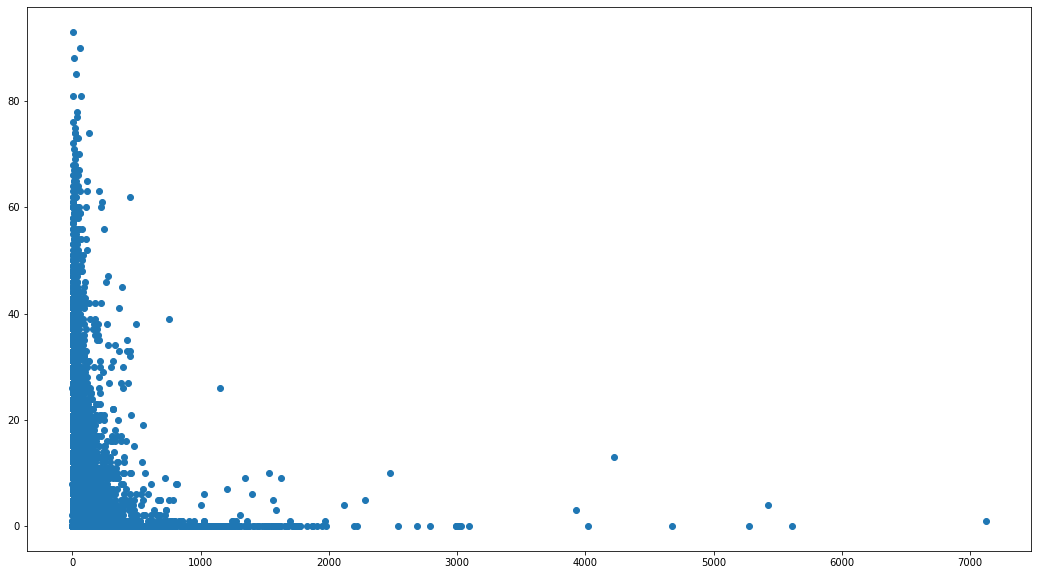

In [6]:
# use Scatter plot to detect outliers
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(df2['avg_rtt_ul_(ms)'], df2['50_kbps_<_dl_tp_<_250_kbps_(%)'])
 

In [7]:
# the points to the right of 2000 are all outliers and need to be removed
num_cols = df2.select_dtypes(include=np.number).columns
dlist = ['bearer_id', 'start_ms', 'end_ms', 'imsi', 'msisdn/number', 'imei']
num_cols = [el for el in num_cols if el not in dlist]

In [10]:
#calculate outlier using Z-score
for col in num_cols:
    sample_outliers = out1.calculate_num_outliers_zscore(df2[col])
    #print(f"Outliers from Z-scores method of {col}", len(sample_outliers))

In [11]:
df2 = out1.handle_outliers(df2, num_cols)

C:\Users\HB\AppData\Local\Temp\ipykernel_10316\3901721151.py:25: RuntimeWarning: divide by zero encountered in log
  df[col] = [np.log(x) for x in df[col]]


In [12]:
df2.head(5)

,bearer_id,start,start_ms,end,end_ms,dur._(ms),imsi,msisdn/number,imei,last_location_name,...,total_ul_(bytes),total_dl_(bytes),social_media,google,email,youtube,netflix,gaming,other,total_data
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,14.416352,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,17.419642,19.548462,0.451193,1.066747,1.308685,2.909953,2.882294,5.678213,5.196057,5.845367
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,14.126741,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,17.800791,20.297677,0.659217,1.484803,-0.064661,3.672728,3.571377,6.413329,6.295191,6.561293
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,14.124290,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,17.143551,19.449612,0.545967,2.325238,1.212870,3.538790,3.167633,5.437993,6.028058,5.729096
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,14.094285,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,17.584222,20.556064,-0.419321,2.469096,0.728023,3.598264,2.714204,6.697513,6.635733,6.790494
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,13.900779,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,17.467280,20.159635,-0.091252,2.047544,0.746853,3.532876,2.864473,6.275208,6.336153,6.409651


In [13]:
outlier_columns = []
for col in num_cols:
    sample_outliers = out1.calculate_num_outliers_zscore(df2[col])
    if len(sample_outliers) > 0:
        outlier_columns.append(col) 
print(len(outlier_columns))

C:\Users\HB\AppData\Local\Temp\ipykernel_10316\3901721151.py:42: RuntimeWarning: invalid value encountered in double_scalars
  z_score = (i-mean)/std


37


# Scale the data 

In [22]:
df3 = df2.copy()
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()

# generate 1000 data points randomly drawn from an exponential distribution
scaled_data = df2.copy()

scaled_data.sample(5)
df3=df3.drop(['social_media','google','email','youtube', 'netflix', 'gaming', 'other', 'total_data'], axis=1)

# Save preprocessed data

In [23]:
df3.to_csv('E:\\10xAccademy_Practice\\Week 1\\Data\\OutlierRemved_telecoData_outliers.csv', index=False)

# save the data
